In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_excel('Data_Mahasiswa_Nama_NIM_Fix.xlsx')

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NIM                                 1000 non-null   int64  
 1   Nama Mahasiswa                      1000 non-null   object 
 2   Jurusan                             1000 non-null   object 
 3   IPK                                 1000 non-null   float64
 4   Jumlah SKS                          1000 non-null   int64  
 5   Nilai Mata Kuliah                   1000 non-null   float64
 6   Jumlah Kehadiran                    1000 non-null   int64  
 7   Jumlah Tugas                        1000 non-null   int64  
 8   Status (Lulus/Tidak)                1000 non-null   object 
 9   Skor Evaluasi Dosen oleh Mahasiswa  1000 non-null   float64
 10  Waktu Lama Studi (semester)         1000 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory us

In [14]:
# Check for missing values
print(df.isnull().sum())

# Drop unnecessary columns if any
# For example, if 'Nama Mahasiswa' is not needed for modeling
df = df.drop(['Nama Mahasiswa'], axis=1)

# Convert 'Status (Lulus/Tidak)' to binary (1 for Lulus, 0 for Tidak)
df['Status'] = df['Status (Lulus/Tidak)'].apply(lambda x: 1 if x == 'Lulus' else 0)
df = df.drop(['Status (Lulus/Tidak)'], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Jurusan'] = label_encoder.fit_transform(df['Jurusan'])

NIM                                   0
Nama Mahasiswa                        0
Jurusan                               0
IPK                                   0
Jumlah SKS                            0
Nilai Mata Kuliah                     0
Jumlah Kehadiran                      0
Jumlah Tugas                          0
Status (Lulus/Tidak)                  0
Skor Evaluasi Dosen oleh Mahasiswa    0
Waktu Lama Studi (semester)           0
dtype: int64


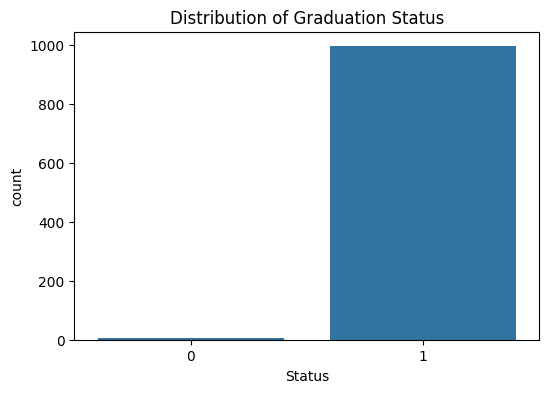

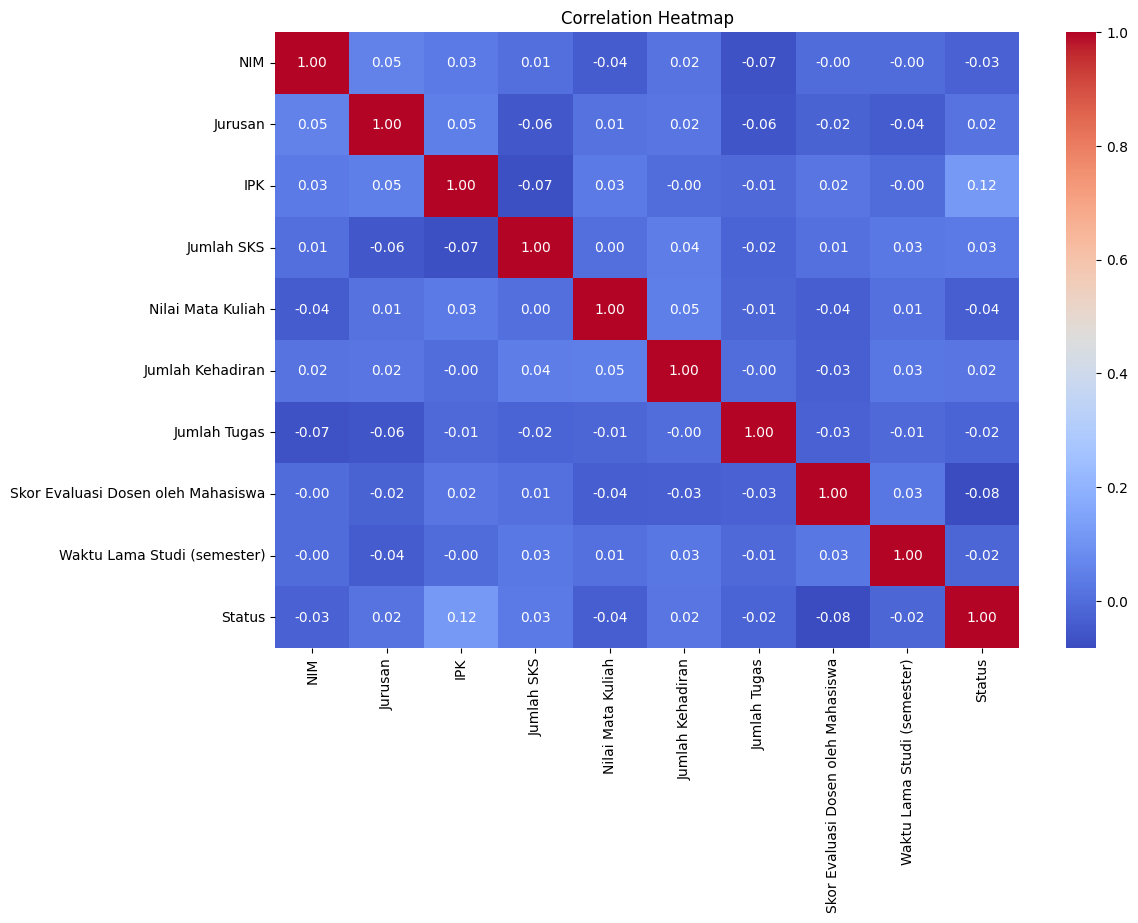

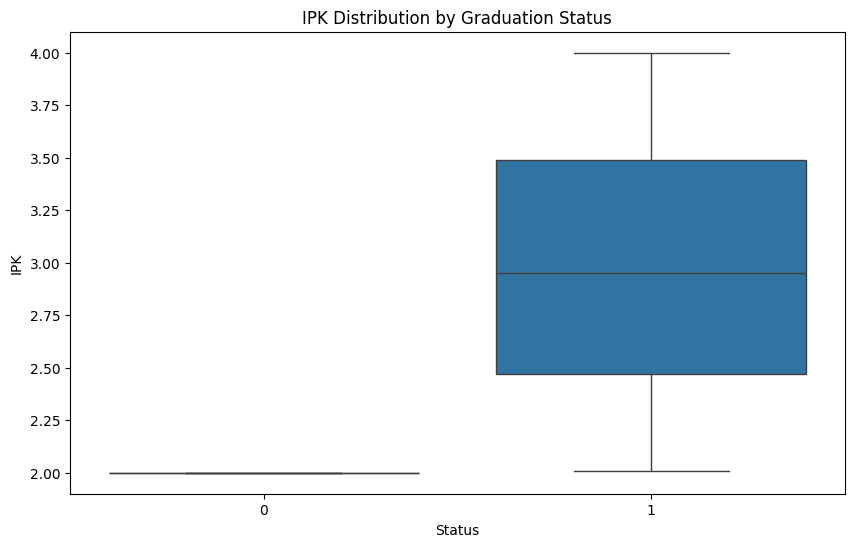

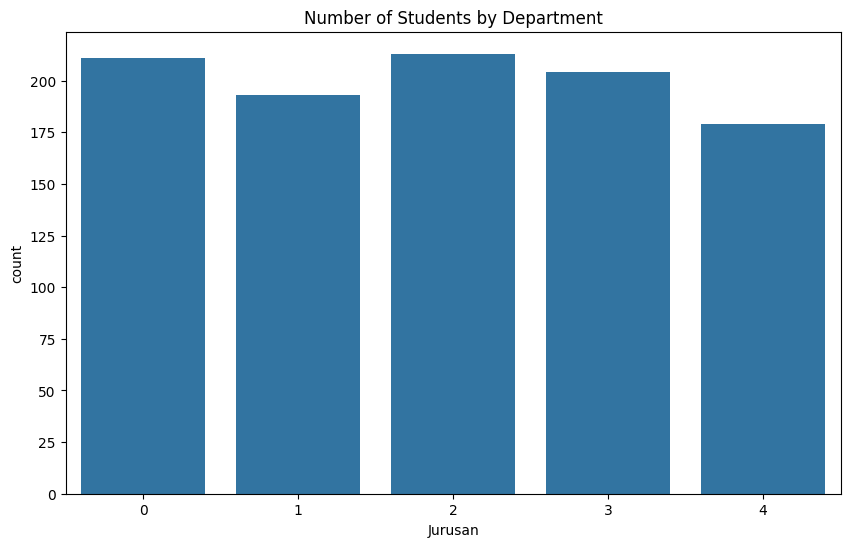

In [15]:
# Visualize distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='Status', data=df)
plt.title('Distribution of Graduation Status')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of IPK by status
plt.figure(figsize=(10,6))
sns.boxplot(x='Status', y='IPK', data=df)
plt.title('IPK Distribution by Graduation Status')
plt.show()

# Count of students by department
plt.figure(figsize=(10,6))
sns.countplot(x='Jurusan', data=df)
plt.title('Number of Students by Department')
plt.show()

In [16]:
# Create new features if needed
# For example, create a feature for total academic performance
df['Academic_Performance'] = df['IPK'] * df['Nilai Mata Kuliah'] / 100

# Drop original columns if new features make them redundant
# df = df.drop(['IPK', 'Nilai Mata Kuliah'], axis=1)

In [17]:
# Define features and target
X = df.drop(['Status', 'NIM'], axis=1)
y = df['Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9933333333333333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.99      1.00      1.00       297

    accuracy                           0.99       300
   macro avg       1.00      0.67      0.75       300
weighted avg       0.99      0.99      0.99       300



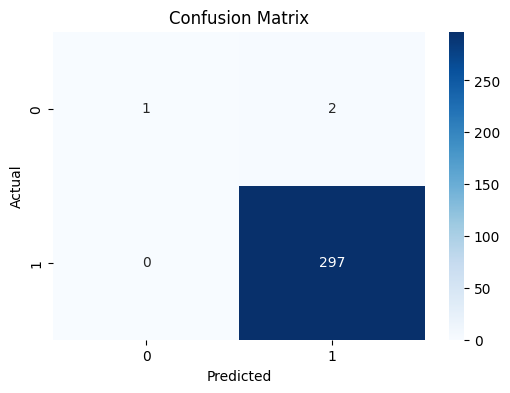

In [19]:
# Predictions
y_pred = rf.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

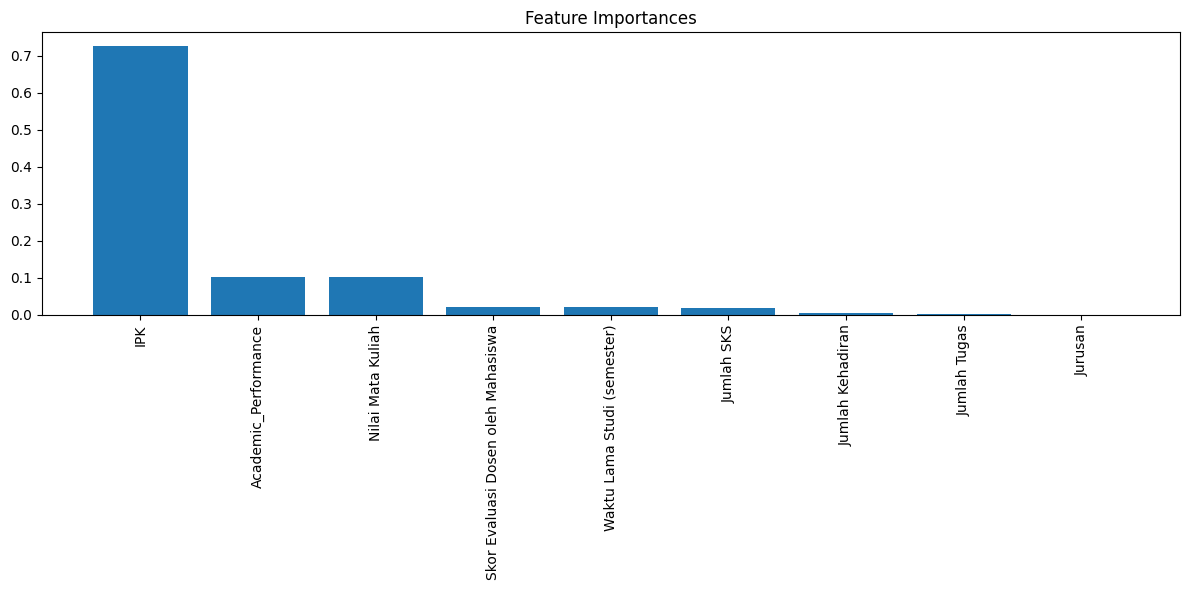

In [20]:
# Get feature importances
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Improved Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Improved Accuracy: 0.99


In [22]:
# prompt: download .pkl

import pickle
from google.colab import files
# Save the trained model to a file
filename = 'random_forest_model.pkl'
pickle.dump(best_rf, open(filename, 'wb'))
# Download the file
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>